In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Dataset\New York City Taxi and Limousine Trip Record\NYC TLC Trip Record.csv')
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23044\3133659884.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Dataset\New York City Taxi and Limousine Trip Record\NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


# Data Dictionary
VendorID : A code indicating the LPEP provider that provided
           the record.
   1. Creative Mobile Technologies, LLC.
   2. VeriFone Inc.
            
lpep_pickup_datetime: The date and time when the meter was engaged.

lpep_dropoff_datetime: The date and time when the meter was disengaged.

Passenger_count : The number of passengers in the vehicle.
                  This is a driver-entered value.
                  
Trip_distance: The elapsed trip distance in miles was reported by the taximeter.

PULocationID: TLC Taxi Zone in which the taximeter was engaged.

DOLocationID: TLC Taxi Zone in which the taximeter was disengaged.

RateCodeID: The final rate code is in effect at the end of the trip.
   1. Standard rate
   2. JFK
   3. Newark
   4. Nassau or Westchester
   5. Negotiated fare
   6. Group ride
            
Store_and_fwd_flag: This flag indicates whether the trip record was held
                    in the vehicle memory before sending to the vendor,
                    aka “store and forward,” because the vehicle did
                    not have a connection to the server.
                    Y = store and forward trip
                    N = not a store and forward trip
                    
Payment_type: A numeric code signifying how the passenger paid for the trip.;
   1. = Credit card;
   2. = Cash;
   3. = No charge;
   4. = Dispute;
   5. = Unknown;
   6. = Voided trip;
                
Fare_amount: The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and 
             surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight 
             charges. 
             
MTA_tax: $0.50 MTA tax that is automatically triggered based on the metered rate in use.

Improvement_surcharge: $0.30 improvement surcharge assessed on hailed trips at the flag drop. 
                       The improvement surcharge began being levied in 2015.
                       
Tip_amount: This field is automatically populated for credit card tips. Cash tips are not included.

Tolls_amount: The total amount of all tolls paid in the trip.

Total_amount: The total amount charged to passengers. Does not include cash tips.

Trip_type: A code indicating whether the trip was a street hail or a dispatch that is automatically 
           assigned based on the metered rate in use but can be altered by the driver.
   1. = Street-hail
   2. = Dispatch


In [2]:
df.info()
#There are still some null data that we need to handle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [3]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

We know that:
1. The ehail_fee column has missing values in the entire row 
2. in the columns 'store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'congestion_surcharge','trip_type' has same amount of missing values

In [4]:
df.duplicated().sum()

0

There is no duplicate data 

In [5]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [6]:
ItemList = []
for col in df.columns :
    ItemList.append([col, df[col].nunique(), df[col].dtype, df[col].unique()])

table = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Data Type', 'Unique Sample'],
                     data=ItemList)
table

,Column Name,Number of Unique,Data Type,Unique Sample
0,VendorID,2,int64,"[2, 1]"
1,lpep_pickup_datetime,66575,object,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,66519,object,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,2,object,"[N, Y, nan]"
4,RatecodeID,6,float64,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,226,int64,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,249,int64,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,10,float64,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,1870,float64,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,2553,float64,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."



1. 'pickup_time' and 'dropoff_time' are columns containing the time and date but these columns still have the object data type so they need to be changed to datetime

2. Based on the data dictionary 'RatecodeID' has values in the range 1-6 but there is a row with a value of 99 and 0 that need to be handled

3. There is a row in the 'passenger_count' and 'trip_distance' column with values 0 that need to be handled while there is row

4. 'RatecodeID, 'passenger_count', 'payment_type', dan 'trip_type' are currently float data type. Maybe just change 'passenger_count' to integer data type and the rest is string type.

5. Ehail fee column contains no data and congestion_surcharge is not in the data dictionary list. So we can just eliminate.

6. There are some columns such as 'fare amount', 'tip amount','mta tax','extra', and 'total amount' contain negative values which are not supposed to

# Data Cleaning

In [7]:
# drop the unnecessary column
df = df.drop(['ehail_fee','congestion_surcharge'],axis=1)

In [8]:
#handling missing values
df = df.dropna(ignore_index = True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0
63873,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0
63874,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0
63875,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0


In [9]:
# simplify some columns name
df.rename(columns={'lpep_pickup_datetime':'pickup_time',
                   'lpep_dropoff_datetime':'dropoff_time',
                   'tip_amount':'tip',
                   'tolls_amount':'tolls',
                   'total_amount':'total'},inplace = True)
df

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0
63873,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0
63874,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0
63875,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0


In [10]:
df['pickup_time'] = pd.to_datetime(df['pickup_time'], format='%Y-%m-%d %H:%M:%S')
df['dropoff_time'] = pd.to_datetime(df['dropoff_time'], format='%Y-%m-%d %H:%M:%S')
df[['VendorID','RatecodeID', 'payment_type', 'trip_type']] = df[['VendorID','RatecodeID', 'payment_type', 'trip_type']].astype(str)
df['passenger_count'] = df['passenger_count'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63877 entries, 0 to 63876
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63877 non-null  object        
 1   pickup_time            63877 non-null  datetime64[ns]
 2   dropoff_time           63877 non-null  datetime64[ns]
 3   store_and_fwd_flag     63877 non-null  object        
 4   RatecodeID             63877 non-null  object        
 5   PULocationID           63877 non-null  int64         
 6   DOLocationID           63877 non-null  int64         
 7   passenger_count        63877 non-null  int32         
 8   trip_distance          63877 non-null  float64       
 9   fare_amount            63877 non-null  float64       
 10  extra                  63877 non-null  float64       
 11  mta_tax                63877 non-null  float64       
 12  tip                    63877 non-null  float64       
 13  t

In [12]:
# To be more understandable, we replace every number with each of its meaning according to data dictionary 
df['VendorID'] = df['VendorID'].replace({
    '1': 'Creative Mobile Technologies, LLC.', 
    '2': 'VeriFone Inc.'})
df['RatecodeID'] = df['RatecodeID'].replace({
    '1.0': 'Standard rate',
    '2.0': 'JFK',
    '3.0': 'Newark',
    '4.0': 'Nassau or Westchester',
    '5.0': 'Negotiated fare',
    '6.0': 'Group ride'})
df['payment_type'] = df['payment_type'].replace({
    '1.0': 'Credit card', 
    '2.0': 'Cash',
    '3.0': 'No charge',
    '4.0': 'Dispute',
    '5.0': 'Unknown',
    '6.0': 'Voided trip'
})
df['trip_type'] = df['trip_type'].replace({
    '1.0': 'Street-hail',
    '2.0': 'Dispatch'})

In [13]:
display(df.describe(), df.describe(include='object'))

,pickup_time,dropoff_time,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total
count,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955
min,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000
25%,2023-01-09 12:15:18,2023-01-09 12:33:17,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000
50%,2023-01-17 08:44:46,2023-01-17 08:59:19,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000
75%,2023-01-24 16:18:41,2023-01-24 16:36:36,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000
std,NaN,NaN,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310


,VendorID,store_and_fwd_flag,RatecodeID,payment_type,trip_type
count,63877,63877,63877,63877,63877
unique,2,2,5,5,2
top,VeriFone Inc.,N,Standard rate,Credit card,Street-hail
freq,54672,63569,62103,40676,62476


In [14]:
#Sort variable (trip_distance) from maximum to minimum value. 

df_sort = df.sort_values(by=['trip_distance'],ascending=False) 
df_sort.head(100)

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
33367,VeriFone Inc.,2023-01-17 18:40:38,2023-01-17 19:04:45,N,Negotiated fare,82,236,1,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,Credit card,Street-hail
7320,VeriFone Inc.,2023-01-05 09:00:03,2023-01-05 15:18:38,N,Negotiated fare,134,134,1,66.18,15.00,0.0,0.0,0.00,0.00,1.0,18.75,Cash,Street-hail
43004,VeriFone Inc.,2023-01-22 10:39:49,2023-01-22 11:48:18,N,Standard rate,82,265,1,57.09,205.30,0.0,0.5,0.00,0.00,1.0,206.80,Cash,Street-hail
48760,VeriFone Inc.,2023-01-24 22:56:13,2023-01-25 19:43:58,N,Negotiated fare,179,264,4,53.72,0.01,0.0,0.0,0.00,0.00,1.0,3.76,Cash,Street-hail
30495,VeriFone Inc.,2023-01-16 11:21:23,2023-01-16 12:07:33,N,Negotiated fare,175,265,1,48.70,140.00,0.0,0.0,0.10,0.00,1.0,141.10,Credit card,Dispatch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62737,VeriFone Inc.,2023-01-31 14:38:15,2023-01-31 16:12:43,N,Standard rate,244,26,1,20.38,110.10,0.0,0.5,0.05,0.00,1.0,114.40,Credit card,Street-hail
20080,VeriFone Inc.,2023-01-11 11:12:44,2023-01-11 11:59:50,N,JFK,244,132,5,20.33,70.00,0.0,0.5,12.00,6.55,1.0,90.05,Credit card,Street-hail
20505,VeriFone Inc.,2023-01-11 14:08:17,2023-01-11 15:09:02,N,JFK,166,132,1,20.31,70.00,0.0,0.5,7.80,6.55,1.0,85.85,Credit card,Street-hail
48887,VeriFone Inc.,2023-01-25 06:37:22,2023-01-25 08:45:49,N,Standard rate,223,74,1,20.26,118.50,0.0,0.5,0.00,6.55,1.0,126.55,Cash,Street-hail


After we handle the missing values, we can see that: 
1. There are still some negative values that need to be handled
2. the minimum of pick up time is in 2009 while the data is from 2023
3. the maximum of the trip distance is 1571 miles with fare amount only 29.97 and duration around 25 minutes which is ridiculous and does not make sense (outlier)

In [15]:
df['pickup_time'].dt.year.unique()

array([2023, 2022, 2009])

In [16]:
df['dropoff_time'].dt.year.unique()

array([2023, 2022, 2009])

We found that there are 3 unique time of year in this data. 
let's check it out more details

In [17]:
df[(df['pickup_time'].dt.year == 2009)|(df['dropoff_time'].dt.year == 2009)]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
17870,VeriFone Inc.,2009-01-01 20:21:27,2009-01-02 11:07:31,N,Standard rate,65,178,1,7.72,34.5,0.0,0.5,7.2,0.0,1.0,43.2,Credit card,Street-hail


In [18]:
df[(df['pickup_time'].dt.year == 2022)|(df['dropoff_time'].dt.year == 2022)]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
298,VeriFone Inc.,2022-12-09 14:10:49,2022-12-09 14:22:26,N,Standard rate,7,56,1,5.37,16.0,0.0,0.5,0.0,0.00,0.3,16.8,Cash,Street-hail
318,VeriFone Inc.,2022-12-09 14:55:42,2022-12-09 15:33:06,N,Standard rate,260,164,1,5.48,25.5,0.0,0.5,0.0,6.55,0.3,35.6,Cash,Street-hail


Since there are 3 data that not belong to 2023 data, we may just drop them out

In [19]:
df.drop(df[df['pickup_time'].dt.year == 2022].index,inplace=True)

In [20]:
df.drop(df[df['pickup_time'].dt.year == 2009].index,inplace=True)

After that, we also check the month format.

In [21]:
df['pickup_time'].dt.month.unique()

array([1, 2])

In [22]:
df['dropoff_time'].dt.month.unique()

array([1, 2])

In [23]:
df[df['pickup_time'].dt.month == 1]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
0,VeriFone Inc.,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail
1,VeriFone Inc.,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail
2,VeriFone Inc.,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail
3,"Creative Mobile Technologies, LLC.",2023-01-01 00:13:14,2023-01-01 00:19:03,N,Standard rate,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit card,Street-hail
4,"Creative Mobile Technologies, LLC.",2023-01-01 00:33:04,2023-01-01 00:39:02,N,Standard rate,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit card,Street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,VeriFone Inc.,2023-01-31 23:09:22,2023-01-31 23:17:21,N,Negotiated fare,130,205,1,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,Credit card,Dispatch
63873,VeriFone Inc.,2023-01-31 23:06:18,2023-01-31 23:17:03,N,Standard rate,65,181,1,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,Credit card,Street-hail
63874,VeriFone Inc.,2023-01-31 23:17:03,2023-01-31 23:23:04,N,Standard rate,244,116,1,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,Credit card,Street-hail
63875,VeriFone Inc.,2023-01-31 23:29:18,2023-01-31 23:38:50,N,Standard rate,74,238,1,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,Credit card,Street-hail


In [24]:
df[df['dropoff_time'].dt.month == 1]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
0,VeriFone Inc.,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail
1,VeriFone Inc.,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail
2,VeriFone Inc.,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail
3,"Creative Mobile Technologies, LLC.",2023-01-01 00:13:14,2023-01-01 00:19:03,N,Standard rate,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit card,Street-hail
4,"Creative Mobile Technologies, LLC.",2023-01-01 00:33:04,2023-01-01 00:39:02,N,Standard rate,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit card,Street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,VeriFone Inc.,2023-01-31 23:09:22,2023-01-31 23:17:21,N,Negotiated fare,130,205,1,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,Credit card,Dispatch
63873,VeriFone Inc.,2023-01-31 23:06:18,2023-01-31 23:17:03,N,Standard rate,65,181,1,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,Credit card,Street-hail
63874,VeriFone Inc.,2023-01-31 23:17:03,2023-01-31 23:23:04,N,Standard rate,244,116,1,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,Credit card,Street-hail
63875,VeriFone Inc.,2023-01-31 23:29:18,2023-01-31 23:38:50,N,Standard rate,74,238,1,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,Credit card,Street-hail


In [25]:
df[df['pickup_time'].dt.month == 2]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
25096,VeriFone Inc.,2023-02-01 03:10:05,2023-02-01 03:40:35,N,Negotiated fare,82,198,2,4.58,28.0,0.0,0.0,5.66,0.0,0.3,33.96,Credit card,Dispatch


In [26]:
df[df['dropoff_time'].dt.month == 2]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
25096,VeriFone Inc.,2023-02-01 03:10:05,2023-02-01 03:40:35,N,Negotiated fare,82,198,2,4.58,28.0,0.0,0.0,5.66,0.0,0.3,33.96,Credit card,Dispatch
61982,VeriFone Inc.,2023-01-31 08:46:26,2023-02-01 07:34:55,N,Standard rate,116,161,1,5.66,32.4,0.0,0.5,5.50,0.0,1.0,42.15,Credit card,Street-hail
62110,VeriFone Inc.,2023-01-31 09:02:52,2023-02-01 09:01:47,N,Standard rate,41,42,1,0.87,7.9,0.0,0.5,0.00,0.0,1.0,9.40,Credit card,Street-hail
62138,VeriFone Inc.,2023-01-31 09:53:33,2023-02-01 00:00:00,N,Standard rate,7,226,1,1.35,9.3,0.0,0.5,0.00,0.0,1.0,10.80,Cash,Street-hail
62500,VeriFone Inc.,2023-01-31 12:41:35,2023-02-01 12:05:19,N,Standard rate,75,42,1,2.17,12.8,0.0,0.5,0.00,0.0,1.0,14.30,Cash,Street-hail
62581,VeriFone Inc.,2023-01-31 13:58:22,2023-02-01 11:46:10,N,Standard rate,130,130,1,0.10,3.7,0.0,0.5,0.00,0.0,1.0,5.20,Cash,Street-hail
62643,VeriFone Inc.,2023-01-31 13:57:30,2023-02-01 10:49:04,N,Standard rate,244,43,3,5.74,31.0,0.0,0.5,0.00,0.0,0.3,34.55,Credit card,Street-hail
62752,VeriFone Inc.,2023-01-31 15:21:47,2023-02-01 00:00:00,N,Standard rate,92,64,2,9.15,39.4,0.0,0.5,4.09,0.0,1.0,44.99,Credit card,Street-hail
63095,VeriFone Inc.,2023-01-31 17:45:46,2023-02-01 17:27:05,N,Standard rate,43,151,1,0.75,5.8,2.5,0.5,2.45,0.0,1.0,12.25,Credit card,Street-hail
63269,VeriFone Inc.,2023-01-31 18:22:24,2023-02-01 00:00:00,N,Standard rate,82,82,1,1.46,10.7,2.5,0.5,0.00,0.0,1.0,14.70,Cash,Street-hail


In January, the pickup column data in January is more than dropoff column data , In February, there is only one data in the pickup column, but in the dropoff column there are 14 data. After further research, there were 13 data that started their journey on January 31 and arrived on February 1.

In [27]:
df_feb = df[df['dropoff_time'].dt.month == 2]
df_feb['trip_duration']= df_feb['dropoff_time'] - df_feb['pickup_time']
df_feb[['pickup_time','dropoff_time','trip_distance','trip_duration']]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23044\3734122379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feb['trip_duration']= df_feb['dropoff_time'] - df_feb['pickup_time']


,pickup_time,dropoff_time,trip_distance,trip_duration
25096,2023-02-01 03:10:05,2023-02-01 03:40:35,4.58,0 days 00:30:30
61982,2023-01-31 08:46:26,2023-02-01 07:34:55,5.66,0 days 22:48:29
62110,2023-01-31 09:02:52,2023-02-01 09:01:47,0.87,0 days 23:58:55
62138,2023-01-31 09:53:33,2023-02-01 00:00:00,1.35,0 days 14:06:27
62500,2023-01-31 12:41:35,2023-02-01 12:05:19,2.17,0 days 23:23:44
62581,2023-01-31 13:58:22,2023-02-01 11:46:10,0.10,0 days 21:47:48
62643,2023-01-31 13:57:30,2023-02-01 10:49:04,5.74,0 days 20:51:34
62752,2023-01-31 15:21:47,2023-02-01 00:00:00,9.15,0 days 08:38:13
63095,2023-01-31 17:45:46,2023-02-01 17:27:05,0.75,0 days 23:41:19
63269,2023-01-31 18:22:24,2023-02-01 00:00:00,1.46,0 days 05:37:36


Various anomalies were found in such a long travel time within a short trip distance.\
We may just remove them and will just analyze the data in January

In [28]:
df.drop(df[df['dropoff_time'].dt.month == 2].index,inplace=True)

In [29]:
df[df['trip_distance']== 0]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
2,VeriFone Inc.,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1,0.0,7.2,1.0,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail
58,VeriFone Inc.,2023-01-01 00:57:15,2023-01-01 01:00:15,N,Standard rate,75,75,1,0.0,4.4,1.0,0.5,1.38,0.0,1.0,8.28,Credit card,Street-hail
99,VeriFone Inc.,2023-01-01 01:27:36,2023-01-01 01:27:43,N,Negotiated fare,168,168,0,0.0,20.0,0.0,0.0,0.00,0.0,1.0,21.00,Credit card,Dispatch
107,VeriFone Inc.,2023-01-01 01:11:13,2023-01-01 01:11:36,N,Standard rate,7,7,1,0.0,3.0,1.0,0.5,9.00,0.0,1.0,14.50,Credit card,Street-hail
115,VeriFone Inc.,2023-01-01 01:52:58,2023-01-01 01:53:00,N,Standard rate,264,264,1,0.0,3.0,1.0,0.5,21.50,0.0,0.3,26.30,Credit card,Street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63788,VeriFone Inc.,2023-01-31 22:19:41,2023-01-31 22:27:59,N,Standard rate,42,152,1,0.0,8.6,1.0,0.5,0.00,0.0,1.0,11.10,Cash,Street-hail
63803,VeriFone Inc.,2023-01-31 22:29:03,2023-01-31 22:35:11,N,Standard rate,95,95,2,0.0,7.2,1.0,0.5,0.00,0.0,1.0,9.70,Cash,Street-hail
63823,VeriFone Inc.,2023-01-31 22:43:19,2023-01-31 22:46:09,N,Negotiated fare,130,130,1,0.0,10.0,0.0,0.0,0.00,0.0,1.0,11.00,Cash,Dispatch
63858,VeriFone Inc.,2023-01-31 23:44:44,2023-01-31 23:45:15,N,Negotiated fare,264,264,1,0.0,-10.0,0.0,0.0,0.00,0.0,-1.0,-11.00,Dispute,Dispatch


There are 3197 data with 0 trip distance while the fare amount exists, which means those data are invalid\
We need to remove them

In [30]:
df.drop(df[df['trip_distance']==0].index,inplace=True)
df[df['trip_distance']== 0] #Removed

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type


In [31]:
df['RatecodeID'].unique() 
# the ratecodeID that does not contain in data dictionary has been removed while handling the others

array(['Standard rate', 'Negotiated fare', 'Nassau or Westchester',
       'Newark', 'JFK'], dtype=object)

In [32]:
df['passenger_count'].unique() 

array([1, 2, 4, 3, 6, 5, 0, 8, 7])

In [33]:
df[df['passenger_count']==0]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
254,"Creative Mobile Technologies, LLC.",2023-01-01 04:21:35,2023-01-01 04:30:00,N,Standard rate,129,129,0,1.3,8.0,0.50,1.5,2.80,4.0,1.0,16.80,Credit card,Street-hail
446,"Creative Mobile Technologies, LLC.",2023-01-01 11:42:13,2023-01-01 11:49:21,N,Standard rate,260,260,0,1.2,8.6,0.00,1.5,2.00,0.0,1.0,12.10,Credit card,Street-hail
486,"Creative Mobile Technologies, LLC.",2023-01-01 12:11:05,2023-01-01 12:20:45,N,Standard rate,42,127,0,3.4,16.3,0.00,1.5,1.00,0.0,1.0,18.80,Credit card,Street-hail
487,"Creative Mobile Technologies, LLC.",2023-01-01 12:56:11,2023-01-01 13:01:06,N,Standard rate,75,236,0,1.2,7.2,2.75,1.5,3.40,0.0,1.0,14.85,Credit card,Street-hail
623,"Creative Mobile Technologies, LLC.",2023-01-01 14:10:14,2023-01-01 14:22:27,N,Standard rate,260,223,0,2.9,14.9,0.00,1.5,3.25,0.0,1.0,19.65,Credit card,Street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62893,"Creative Mobile Technologies, LLC.",2023-01-31 16:41:24,2023-01-31 17:00:06,N,Standard rate,75,74,0,1.3,17.0,2.50,1.5,4.20,0.0,1.0,25.20,Credit card,Street-hail
63064,"Creative Mobile Technologies, LLC.",2023-01-31 17:31:16,2023-01-31 17:35:58,N,Standard rate,75,236,0,0.9,7.2,5.25,1.5,3.45,0.0,1.0,17.40,Credit card,Street-hail
63065,"Creative Mobile Technologies, LLC.",2023-01-31 17:45:26,2023-01-31 17:53:17,N,Standard rate,75,263,0,1.2,9.3,5.25,1.5,3.20,0.0,1.0,19.25,Credit card,Street-hail
63237,"Creative Mobile Technologies, LLC.",2023-01-31 18:01:21,2023-01-31 18:09:22,N,Standard rate,236,236,0,1.0,9.3,5.25,1.5,3.20,0.0,1.0,19.25,Credit card,Street-hail


In [34]:
#It supposed to be no trip that occured while there were no passanger
#So we have to remove these invalid data
df.drop(df[df['passenger_count']==0].index,inplace=True)
df[df['passenger_count']==0]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type


In [35]:
df['payment_type'].unique()

array(['Credit card', 'Cash', 'No charge', 'Dispute'], dtype=object)

In [36]:
df[df['payment_type']=='No charge']

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
35,"Creative Mobile Technologies, LLC.",2023-01-01 00:41:53,2023-01-01 00:41:58,N,Standard rate,83,83,1,6.70,3.0,1.0,1.5,0.0,0.0,1.0,5.5,No charge,Street-hail
198,"Creative Mobile Technologies, LLC.",2023-01-01 03:06:11,2023-01-01 03:06:41,N,Negotiated fare,101,101,1,1.30,90.0,0.0,0.0,0.0,0.0,0.0,90.0,No charge,Dispatch
662,VeriFone Inc.,2023-01-01 14:58:13,2023-01-01 14:58:39,N,Standard rate,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,No charge,Street-hail
663,VeriFone Inc.,2023-01-01 14:58:13,2023-01-01 14:58:39,N,Standard rate,75,74,2,0.17,3.0,0.0,0.5,0.0,0.0,1.0,4.5,No charge,Street-hail
1316,VeriFone Inc.,2023-01-02 02:05:08,2023-01-02 02:12:57,N,Standard rate,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,No charge,Street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62413,"Creative Mobile Technologies, LLC.",2023-01-31 12:24:17,2023-01-31 12:47:34,N,Standard rate,69,81,1,10.50,31.5,0.0,1.5,0.0,0.0,1.0,33.0,No charge,Street-hail
63534,VeriFone Inc.,2023-01-31 19:06:18,2023-01-31 19:06:46,N,Standard rate,75,75,2,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,No charge,Street-hail
63535,VeriFone Inc.,2023-01-31 19:06:18,2023-01-31 19:06:46,N,Standard rate,75,75,2,0.08,3.0,2.5,0.5,0.0,0.0,1.0,7.0,No charge,Street-hail
63797,VeriFone Inc.,2023-01-31 22:44:16,2023-01-31 22:45:18,N,Standard rate,256,256,1,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,No charge,Street-hail


In [37]:
df[(df['payment_type']=='No charge')&(df['total']!=0)]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
35,"Creative Mobile Technologies, LLC.",2023-01-01 00:41:53,2023-01-01 00:41:58,N,Standard rate,83,83,1,6.70,3.0,1.0,1.5,0.0,0.0,1.0,5.5,No charge,Street-hail
198,"Creative Mobile Technologies, LLC.",2023-01-01 03:06:11,2023-01-01 03:06:41,N,Negotiated fare,101,101,1,1.30,90.0,0.0,0.0,0.0,0.0,0.0,90.0,No charge,Dispatch
662,VeriFone Inc.,2023-01-01 14:58:13,2023-01-01 14:58:39,N,Standard rate,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,No charge,Street-hail
663,VeriFone Inc.,2023-01-01 14:58:13,2023-01-01 14:58:39,N,Standard rate,75,74,2,0.17,3.0,0.0,0.5,0.0,0.0,1.0,4.5,No charge,Street-hail
1316,VeriFone Inc.,2023-01-02 02:05:08,2023-01-02 02:12:57,N,Standard rate,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,No charge,Street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62413,"Creative Mobile Technologies, LLC.",2023-01-31 12:24:17,2023-01-31 12:47:34,N,Standard rate,69,81,1,10.50,31.5,0.0,1.5,0.0,0.0,1.0,33.0,No charge,Street-hail
63534,VeriFone Inc.,2023-01-31 19:06:18,2023-01-31 19:06:46,N,Standard rate,75,75,2,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,No charge,Street-hail
63535,VeriFone Inc.,2023-01-31 19:06:18,2023-01-31 19:06:46,N,Standard rate,75,75,2,0.08,3.0,2.5,0.5,0.0,0.0,1.0,7.0,No charge,Street-hail
63797,VeriFone Inc.,2023-01-31 22:44:16,2023-01-31 22:45:18,N,Standard rate,256,256,1,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,No charge,Street-hail


Payment type 'No Charge' means there should be zero amount in total column.\
so the payment type 'No Charge' with other than zero amount can be considered as invalid data

In [38]:
df.drop(df[(df['payment_type'] == 'No charge')&(df['total'] != 0)].index, inplace=True)
df.drop(df[(df['payment_type'] != 'No charge')&(df['total'] == 0)].index, inplace=True)
#removed

In [39]:
df[(df['payment_type'] == 'No charge')&(df['total'] == 0)]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
51891,"Creative Mobile Technologies, LLC.",2023-01-26 10:50:42,2023-01-26 10:51:30,N,Negotiated fare,41,75,2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No charge,Dispatch


In [40]:
df[df['total'] < 0]

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
1685,VeriFone Inc.,2023-01-02 12:56:53,2023-01-02 13:00:10,N,Standard rate,75,75,1,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.30,Dispute,Street-hail
3759,VeriFone Inc.,2023-01-03 14:25:22,2023-01-03 14:27:53,N,Standard rate,42,42,2,0.32,-4.4,0.0,-0.5,0.0,0.0,-1.0,-5.90,Dispute,Street-hail
7993,VeriFone Inc.,2023-01-05 14:03:43,2023-01-05 14:08:18,N,Standard rate,236,238,1,0.75,-6.5,0.0,-0.5,0.0,0.0,-1.0,-8.00,Dispute,Street-hail
8165,VeriFone Inc.,2023-01-05 15:01:39,2023-01-05 15:02:16,N,Standard rate,166,166,1,0.13,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.50,Dispute,Street-hail
8332,VeriFone Inc.,2023-01-05 16:05:34,2023-01-05 16:15:46,N,Standard rate,95,196,1,0.61,-9.3,-2.5,-0.5,0.0,0.0,-1.0,-13.30,Dispute,Street-hail
10013,VeriFone Inc.,2023-01-06 12:06:25,2023-01-06 12:06:59,N,Standard rate,42,42,2,0.08,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.50,Dispute,Street-hail
10146,VeriFone Inc.,2023-01-06 13:49:49,2023-01-06 13:50:20,N,Standard rate,75,75,2,0.10,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.50,Dispute,Street-hail
27015,VeriFone Inc.,2023-01-14 11:18:56,2023-01-14 11:19:11,N,Standard rate,42,42,2,0.03,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.50,Dispute,Street-hail
28394,VeriFone Inc.,2023-01-14 22:01:31,2023-01-14 22:05:08,N,Standard rate,41,41,1,0.74,-5.8,-1.0,-0.5,0.0,0.0,-1.0,-8.30,Dispute,Street-hail
30121,VeriFone Inc.,2023-01-15 23:36:22,2023-01-15 23:37:36,N,Standard rate,36,36,2,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.20,Dispute,Street-hail


In [41]:
df.drop(df[df['total'] < 0].index,inplace=True) 
df[df['total'] < 0]
# Since there is no negative value of fare amount, the data can be considered as invalid

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type


In [42]:
display(df.info(),df.describe(), df.describe(include='object')) 
#The data now can be considered clean enough to analyze
#But there is still outlier that need to be handled

<class 'pandas.core.frame.DataFrame'>
Index: 60034 entries, 0 to 63876
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               60034 non-null  object        
 1   pickup_time            60034 non-null  datetime64[ns]
 2   dropoff_time           60034 non-null  datetime64[ns]
 3   store_and_fwd_flag     60034 non-null  object        
 4   RatecodeID             60034 non-null  object        
 5   PULocationID           60034 non-null  int64         
 6   DOLocationID           60034 non-null  int64         
 7   passenger_count        60034 non-null  int32         
 8   trip_distance          60034 non-null  float64       
 9   fare_amount            60034 non-null  float64       
 10  extra                  60034 non-null  float64       
 11  mta_tax                60034 non-null  float64       
 12  tip                    60034 non-null  float64       
 13  tolls 

None

,pickup_time,dropoff_time,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total
count,60034,60034,60034.000000,60034.000000,60034.000000,60034.000000,60034.000000,60034.000000,60034.000000,60034.000000,60034.000000,60034.000000,60034.000000
mean,2023-01-16 23:02:57.986274560,2023-01-16 23:20:51.067478272,96.406853,138.266249,1.331945,2.720456,15.956164,0.912600,0.612228,2.111861,0.130717,0.955245,21.218028
min,2023-01-01 00:01:31,2023-01-01 00:13:26,3.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-01-09 12:40:31.500000,2023-01-09 12:55:49.249999872,74.000000,74.000000,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.850000
50%,2023-01-17 09:22:48.500000,2023-01-17 09:41:05,75.000000,138.000000,1.000000,1.890000,12.800000,0.000000,0.500000,1.660000,0.000000,1.000000,17.500000
75%,2023-01-24 16:32:34.500000,2023-01-24 16:50:33.750000128,112.000000,223.000000,1.000000,3.170000,19.100000,2.500000,0.500000,3.280000,0.000000,1.000000,25.450000
max,2023-01-31 23:45:10,2023-01-31 23:55:05,265.000000,265.000000,8.000000,1571.970000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000
std,NaN,NaN,58.623879,76.588228,0.991519,6.939446,12.168381,1.300117,0.333615,2.959974,0.961315,0.172208,14.193631


,VendorID,store_and_fwd_flag,RatecodeID,payment_type,trip_type
count,60034,60034,60034,60034,60034
unique,2,2,5,4,2
top,VeriFone Inc.,N,Standard rate,Credit card,Street-hail
freq,52752,59794,58887,38229,59199


In [43]:
#Sort variable (total_amaount) from maximum to minimum value. 

df_sort = df.sort_values(by=['total'],ascending=False)
df_sort.head(10)

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
59432,VeriFone Inc.,2023-01-29 20:01:58,2023-01-29 20:05:25,N,Negotiated fare,92,92,1,0.07,455.0,0.0,0.0,0.0,0.0,1.0,456.0,Cash,Dispatch
18470,VeriFone Inc.,2023-01-10 15:58:15,2023-01-10 15:58:26,N,Negotiated fare,92,92,1,0.38,440.0,0.0,0.0,0.0,0.0,1.0,441.0,Cash,Dispatch
50516,VeriFone Inc.,2023-01-25 17:14:16,2023-01-25 17:21:43,N,Negotiated fare,80,37,1,0.60,425.0,0.0,0.0,0.0,0.0,1.0,426.0,Cash,Dispatch
61646,VeriFone Inc.,2023-01-30 22:13:19,2023-01-30 22:13:32,N,Negotiated fare,82,82,1,0.02,399.0,0.0,0.0,0.0,0.0,1.0,400.0,Cash,Dispatch
7729,VeriFone Inc.,2023-01-05 12:12:49,2023-01-05 19:53:49,N,Standard rate,223,223,1,25.48,348.1,0.0,0.5,0.0,0.0,1.0,349.6,Cash,Street-hail
25514,VeriFone Inc.,2023-01-13 16:51:53,2023-01-13 18:37:48,N,Nassau or Westchester,265,92,2,38.24,322.2,2.5,0.0,0.0,21.3,1.0,347.0,Cash,Street-hail
44918,VeriFone Inc.,2023-01-23 10:28:05,2023-01-23 11:33:51,N,Nassau or Westchester,95,265,1,47.25,322.9,0.0,0.5,0.0,0.0,1.0,324.4,Cash,Street-hail
50427,VeriFone Inc.,2023-01-25 17:24:38,2023-01-25 19:16:52,N,Nassau or Westchester,82,265,5,46.29,292.1,2.5,0.5,0.0,0.0,1.0,296.1,Cash,Street-hail
556,VeriFone Inc.,2023-01-01 13:07:46,2023-01-01 19:45:18,N,Standard rate,223,8,1,16.00,292.8,0.0,0.5,0.0,0.0,1.0,294.3,Cash,Street-hail
62304,VeriFone Inc.,2023-01-31 11:26:06,2023-01-31 12:19:14,N,Nassau or Westchester,130,265,1,48.19,258.5,0.0,0.5,0.0,0.0,1.0,260.0,Cash,Street-hail


<Axes: xlabel='trip_distance'>

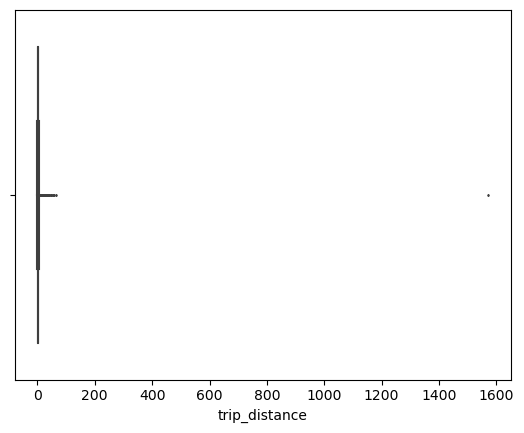

In [44]:
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1)
# There is an outlier which the trip distance equals 1571 mils and total amount 
# according to the data, the value of outlier does not make sense

In [45]:
df[df['trip_distance'] > 100] # This outlier need to be removed

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
33367,VeriFone Inc.,2023-01-17 18:40:38,2023-01-17 19:04:45,N,Negotiated fare,82,236,1,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,Credit card,Street-hail


In [46]:
df.drop(df[df['trip_distance'] > 100].index,inplace=True)
df[df['trip_distance'] > 100] # Removed

,VendorID,pickup_time,dropoff_time,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type


<Axes: xlabel='tolls'>

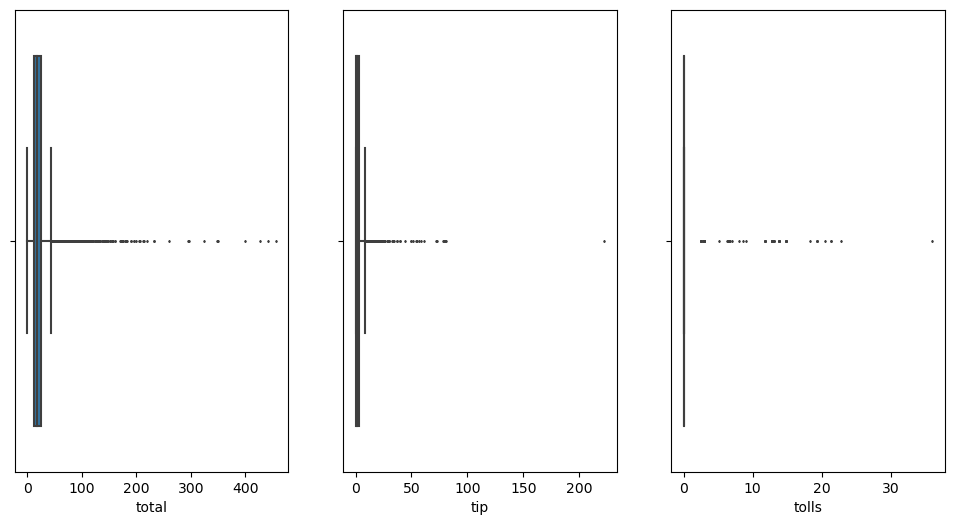

In [47]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(data=None, x=df['total'], fliersize=1)

plt.subplot(1,3,2)
sns.boxplot(data=None, x=df['tip'], fliersize=1)

plt.subplot(1,3,3)
sns.boxplot(data=None, x=df['tolls'], fliersize=1)


There are still various outliers exist but we may just ignore it because tip and toll fare are paid by certain person and condition (not a regular fee)

Next, we will classify the time into 3 kinds : 'Overnight','Rush Hour','Regular'\
So that we could know what time has the most transaction

In [48]:
idx = pd.DatetimeIndex(df['pickup_time'])
length = np.arange(len(df))

conds = [np.in1d(length, idx.indexer_between_time('16:00:00', '20:00:00', include_start=True, include_end=True)),
         np.in1d(length, idx.indexer_between_time('20:00:01', '00:00:00', include_start=True, include_end=True)),
         np.in1d(length, idx.indexer_between_time('00:00:01', '07:00:00', include_start=True, include_end=True)),
         np.in1d(length, idx.indexer_between_time('07:00:01', '10:00:00', include_start=True, include_end=True))]

values = ['Rush Hour', 'Overnight', 'Overnight','Rush Hour']

df['time_label'] = np.select(conds, values, default='Regular')

In [49]:
# classify day of week into 2 types: weekend and weekday
df['day_of_week'] = df['pickup_time'].dt.dayofweek
df.loc[df['day_of_week'] >= 5, 'day_type'] = "Weekend"
df.loc[df['day_of_week'] < 5, 'day_type'] = "Weekday"



In [50]:
df['day_of_week'] = df['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
# Replace each number into name of day

In [51]:
for col, pos in zip(['time_label','day_of_week','day_type'], [3,4,5]):
    column = df.pop(col)
    df.insert(pos, col, column)

df # Move to front position for easier seek

,VendorID,pickup_time,dropoff_time,time_label,day_of_week,day_type,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,...,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
0,VeriFone Inc.,2023-01-01 00:26:10,2023-01-01 00:37:11,Overnight,Sunday,Weekend,N,Standard rate,166,143,...,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail
1,VeriFone Inc.,2023-01-01 00:51:03,2023-01-01 00:57:49,Overnight,Sunday,Weekend,N,Standard rate,24,43,...,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail
3,"Creative Mobile Technologies, LLC.",2023-01-01 00:13:14,2023-01-01 00:19:03,Overnight,Sunday,Weekend,N,Standard rate,41,238,...,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit card,Street-hail
4,"Creative Mobile Technologies, LLC.",2023-01-01 00:33:04,2023-01-01 00:39:02,Overnight,Sunday,Weekend,N,Standard rate,41,74,...,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit card,Street-hail
5,VeriFone Inc.,2023-01-01 00:53:31,2023-01-01 01:11:04,Overnight,Sunday,Weekend,N,Standard rate,41,262,...,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,VeriFone Inc.,2023-01-31 23:09:22,2023-01-31 23:17:21,Overnight,Tuesday,Weekday,N,Negotiated fare,130,205,...,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,Credit card,Dispatch
63873,VeriFone Inc.,2023-01-31 23:06:18,2023-01-31 23:17:03,Overnight,Tuesday,Weekday,N,Standard rate,65,181,...,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,Credit card,Street-hail
63874,VeriFone Inc.,2023-01-31 23:17:03,2023-01-31 23:23:04,Overnight,Tuesday,Weekday,N,Standard rate,244,116,...,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,Credit card,Street-hail
63875,VeriFone Inc.,2023-01-31 23:29:18,2023-01-31 23:38:50,Overnight,Tuesday,Weekday,N,Standard rate,74,238,...,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,Credit card,Street-hail


In [52]:
df.reset_index(drop=True, inplace=True) # reset the row index
df

,VendorID,pickup_time,dropoff_time,time_label,day_of_week,day_type,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,...,trip_distance,fare_amount,extra,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type
0,VeriFone Inc.,2023-01-01 00:26:10,2023-01-01 00:37:11,Overnight,Sunday,Weekend,N,Standard rate,166,143,...,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail
1,VeriFone Inc.,2023-01-01 00:51:03,2023-01-01 00:57:49,Overnight,Sunday,Weekend,N,Standard rate,24,43,...,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail
2,"Creative Mobile Technologies, LLC.",2023-01-01 00:13:14,2023-01-01 00:19:03,Overnight,Sunday,Weekend,N,Standard rate,41,238,...,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit card,Street-hail
3,"Creative Mobile Technologies, LLC.",2023-01-01 00:33:04,2023-01-01 00:39:02,Overnight,Sunday,Weekend,N,Standard rate,41,74,...,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit card,Street-hail
4,VeriFone Inc.,2023-01-01 00:53:31,2023-01-01 01:11:04,Overnight,Sunday,Weekend,N,Standard rate,41,262,...,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60028,VeriFone Inc.,2023-01-31 23:09:22,2023-01-31 23:17:21,Overnight,Tuesday,Weekday,N,Negotiated fare,130,205,...,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,Credit card,Dispatch
60029,VeriFone Inc.,2023-01-31 23:06:18,2023-01-31 23:17:03,Overnight,Tuesday,Weekday,N,Standard rate,65,181,...,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,Credit card,Street-hail
60030,VeriFone Inc.,2023-01-31 23:17:03,2023-01-31 23:23:04,Overnight,Tuesday,Weekday,N,Standard rate,244,116,...,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,Credit card,Street-hail
60031,VeriFone Inc.,2023-01-31 23:29:18,2023-01-31 23:38:50,Overnight,Tuesday,Weekday,N,Standard rate,74,238,...,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,Credit card,Street-hail


# Data Analyst

Next, After data cleaning is done, we can move to data analyst part\
Let's check the distribution and correlation of the data to find out what methods are appropriate for analyzing the data.

In [53]:
# statistic test if normal distribution
from scipy.stats import normaltest
from scipy.stats import shapiro

listPvalue = []
listNorm = []
listCol = ['trip_distance','fare_amount','total']

for i in listCol :
    Ha = 'Not Normally distributed'
    H0 = 'Normally Distributed'
    stat,pvalue=normaltest(df[i])
    if pvalue > 0.05:
        result = H0 # accept Ho
    else: 
        result = Ha # reject Ho
    listPvalue.append(pvalue)
    listNorm.append(result)
 

dfNormal = pd.DataFrame({
    'Column' : listCol,
    'Status' : listNorm,
    'pvalue' : listPvalue    
})
dfNormal

,Column,Status,pvalue
0,trip_distance,Not Normally distributed,0.0
1,fare_amount,Not Normally distributed,0.0
2,total,Not Normally distributed,0.0


In [54]:
dfCorr = df[['passenger_count','trip_distance','fare_amount','tip','tolls','total']].corr(method='spearman')
dfCorr

,passenger_count,trip_distance,fare_amount,tip,tolls,total
passenger_count,1.000000,0.019592,0.031746,0.017231,0.006983,0.035009
trip_distance,0.019592,1.000000,0.929081,0.277637,0.216059,0.889002
fare_amount,0.031746,0.929081,1.000000,0.276637,0.206806,0.944199
tip,0.017231,0.277637,0.276637,1.000000,0.090932,0.477303
tolls,0.006983,0.216059,0.206806,0.090932,1.000000,0.219905
total,0.035009,0.889002,0.944199,0.477303,0.219905,1.000000


Text(0.5, 1.0, '"total" and "trip_distance"')

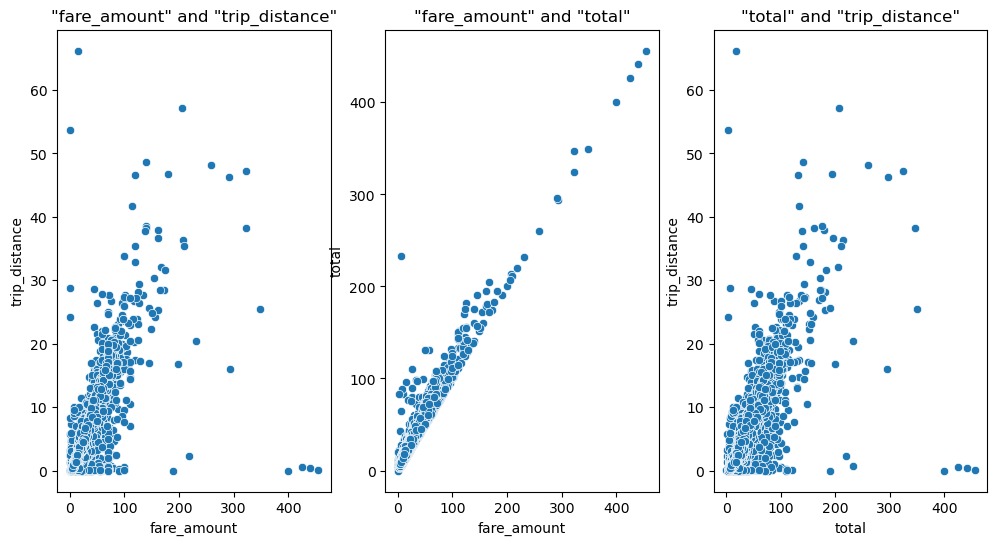

In [55]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x='fare_amount', y='trip_distance')
plt.title('"fare_amount" and "trip_distance"')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='fare_amount', y='total')
plt.title('"fare_amount" and "total"')

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='total', y='trip_distance')
plt.title('"total" and "trip_distance"')

Insight:
1. The strongest positive correlation is found in 'fare_amount' with 'total', this obviously shows that the greater the fare_amount, the greater the value of the total

2. The second positive correlation is found in the relationship between 'trip_distance' and 'fare_amount' which is similiar to the relationship between 'trip_distance' and 'total'. 

It is in accordance with the true situation where the travel distance definitely affects the metered cost of the taximeter, the longer the travel distance, the greater the meter costs and total overall costs.

Text(0, 0.5, 'Count')

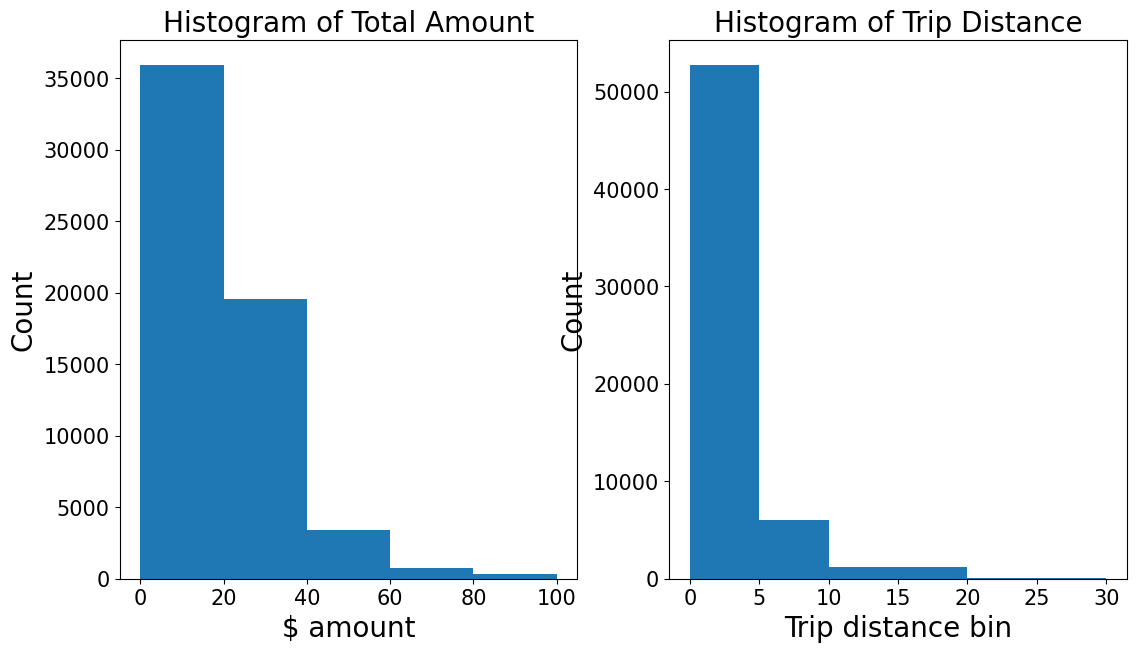

In [56]:
# Next we want to know the quantity within each range of total amount and trip distance
plt.figure(figsize=(13,7))

plt.subplot(1,2,1)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.hist(df['total'],bins=[0,20,40,60,80,100])
plt.title('Histogram of Total Amount',fontsize=20)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('$ amount',fontsize=20)
plt.ylabel('Count', fontsize=20)

#Histogram of TRIP DISTANCE
plt.subplot(1,2,2)
plt.hist(df['trip_distance'],bins=[0,5,10,20,25,30])
plt.title('Histogram of Trip Distance',fontsize=20)
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('Trip distance bin',fontsize=20)
plt.ylabel('Count', fontsize=20)

insight: Mosly total amount that was paid in a trip is range "0 - 20 dollars" and most trip distance is in between "0 - 5 miles"

In [57]:
# what is the average fare amount and quantity for each payment type
avg = df.groupby('payment_type')['total'].mean()
qty = df.groupby('payment_type')['total'].count()
display(avg, qty)

payment_type
Cash           18.453867
Credit card    22.804674
Dispute        10.423958
No charge       0.000000
Name: total, dtype: float64

payment_type
Cash           21756
Credit card    38228
Dispute           48
No charge          1
Name: total, dtype: int64

According to the result, **'credit card'** payment type is used by the passenger the most and second is **'cash'** \
Let's check if there is any difference in average total fare between passenger who use **'credit card'** and **'cash'** \
\
𝐻0: There is no difference in the average total amount between customers who use credit cards and customers who use cash.

𝐻a: There is a difference in the average total amount between customers who use credit cards and customers who use cash.


In [58]:
from scipy import stats 

cc = df[df['payment_type'] == 'Credit card']['total']
cash = df[df['payment_type'] == 'Cash']['total']
stats.ttest_ind(a=cc, b=cash, equal_var=False)

TtestResult(statistic=35.74472615712239, pvalue=1.0012074470912111e-275, df=42469.67921256749)

Insight:\
Since the p-value is extremely smaller than the significance level of 0.05, we may reject H0. \
There is a statistically significant difference in the average total amount between customers who use credit cards and customers who use cash.\
We can conclude that credit card payment type is used by the passenger the most

In [59]:
# Analyze number of trips and number of passengers based on time labels
Total_trip = df.groupby('time_label',as_index=False)[['passenger_count']].count().sort_values('passenger_count',ascending=False).rename(columns={'passenger_count':'Total_trip'})
Total_trip['percentage'] = (Total_trip['Total_trip']/len(df))*100

Total_passenger = df.groupby('time_label',as_index=False)[['passenger_count']].sum().sort_values('passenger_count',ascending=False).rename(columns={'passenger_count':'Total_passenger'})
Total_passenger['percentage'] = (Total_passenger['Total_passenger']/len(df))*100

display(Total_trip, Total_passenger)

,time_label,Total_trip,percentage
2,Rush Hour,26098,43.472757
1,Regular,21545,35.888595
0,Overnight,12390,20.638649


,time_label,Total_passenger,percentage
2,Rush Hour,34609,57.649959
1,Regular,28573,47.595489
0,Overnight,16779,27.949628


Text(0.5, 1.0, '"time_label" and "total_passenger"')

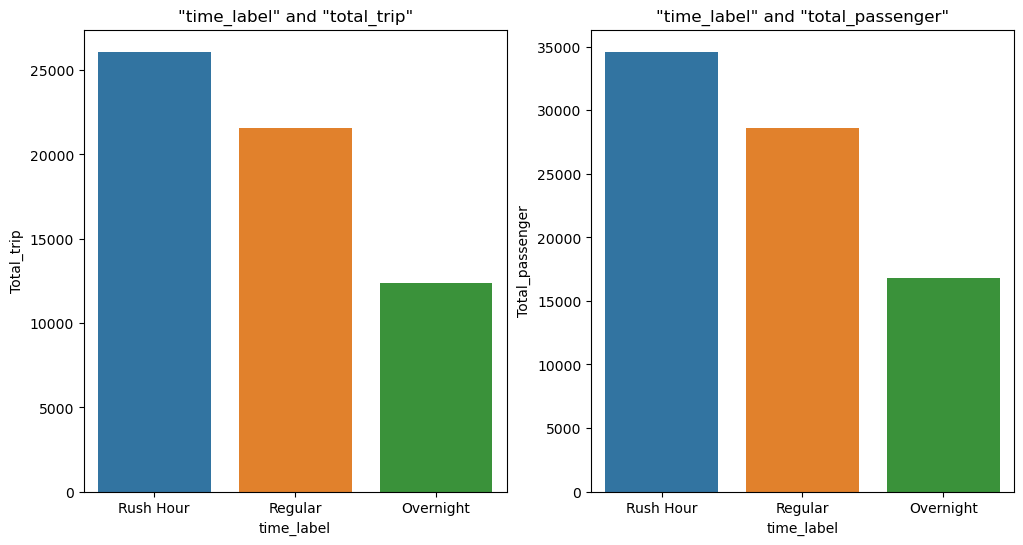

In [60]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(data = Total_trip , x='time_label', y= 'Total_trip')
plt.title('"time_label" and "total_trip"')

plt.subplot(1,2,2)
sns.barplot(data = Total_passenger , x='time_label', y= 'Total_passenger')
plt.title('"time_label" and "total_passenger"')

Insight:\
At rush hour, it has the highest number of bookings and passengers, namely 26098 bookings with a total of 34609 passengers.\
We can conclude in accordance to the true situation that a lot of people are on their way to work on weekdays

In [61]:
x = df.pivot_table(values='passenger_count', index='time_label', columns='trip_type', aggfunc='count')
y = df.pivot_table(values='passenger_count', index='day_of_week', columns='time_label', aggfunc='count')
z = df.pivot_table(values='passenger_count', index='time_label', columns='payment_type', aggfunc='count')
display(x,y,z)

trip_type,Dispatch,Street-hail
time_label,,
Overnight,318,12072
Regular,259,21286
Rush Hour,258,25840


time_label,Overnight,Regular,Rush Hour
day_of_week,,,
Friday,1775,3043,3966
Monday,1561,3329,3931
Saturday,2092,2793,2615
Sunday,2159,2704,2415
Thursday,1635,3131,4215
Tuesday,1677,3511,4755
Wednesday,1491,3034,4201


payment_type,Cash,Credit card,Dispute,No charge
time_label,,,,
Overnight,4421.0,7954.0,15.0,NaN
Regular,8781.0,12740.0,23.0,1.0
Rush Hour,8554.0,17534.0,10.0,NaN


Insight:
1. In this type of travel, almost 99% of trips are made by 'Street-hail' type, because it has become part of the culture in New York with its iconic yellow taxi itself which makes orders directly on the side of the road and people are used to this method. 

2. Most passengers prefer to make payments using credit, of the three times (Regular, Rush Hour, Overnight) the overall type of payment is dominated by credit card payments.

3. There are as many as 48 trips with dispute payment type, which means there is a dispute between the passenger and driver in determining the price for which the cause is unknown.

4. Most passengers make overnight trips during weekend which are not working days while most passengers take rush hour trips on weekdays (working days).

In [76]:
dfZone = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Dataset\New York City Taxi and Limousine Trip Record\taxi_zones.csv')
dfZone #Import taxi zone which corresponds to each Location ID

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...,...
258,256,0.067915,MULTIPOLYGON (((-73.95834207500002 40.71330630...,0.000169,Williamsburg (South Side),256,Brooklyn
259,259,0.126750,MULTIPOLYGON (((-73.85107116191898 40.91037152...,0.000395,Woodlawn/Wakefield,259,Bronx
260,260,0.133514,MULTIPOLYGON (((-73.90175373399988 40.76077547...,0.000422,Woodside,260,Queens
261,261,0.027120,MULTIPOLYGON (((-74.01332610899988 40.70503078...,0.000034,World Trade Center,261,Manhattan


In [77]:
zone1 = dict(zip(dfZone['LocationID'], dfZone['zone']))
zone2 = dict(zip(dfZone['LocationID'], dfZone['borough']))

In [78]:
#Create mapping each location ID with the name of zone 
df['PU_ID'] = df['PULocationID'].map(zone1)
df['DO_ID'] = df['DOLocationID'].map(zone1)
df['PU_borough'] = df['PULocationID'].map(zone2)
df

,VendorID,pickup_time,dropoff_time,time_label,day_of_week,day_type,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,...,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type,PU_ID,DO_ID,PU_borough
0,VeriFone Inc.,2023-01-01 00:26:10,2023-01-01 00:37:11,Overnight,Sunday,Weekend,N,Standard rate,166,143,...,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail,Morningside Heights,Lincoln Square West,Manhattan
1,VeriFone Inc.,2023-01-01 00:51:03,2023-01-01 00:57:49,Overnight,Sunday,Weekend,N,Standard rate,24,43,...,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail,Bloomingdale,Central Park,Manhattan
2,"Creative Mobile Technologies, LLC.",2023-01-01 00:13:14,2023-01-01 00:19:03,Overnight,Sunday,Weekend,N,Standard rate,41,238,...,1.5,1.70,0.0,1.0,10.20,Credit card,Street-hail,Central Harlem,Upper West Side North,Manhattan
3,"Creative Mobile Technologies, LLC.",2023-01-01 00:33:04,2023-01-01 00:39:02,Overnight,Sunday,Weekend,N,Standard rate,41,74,...,1.5,0.00,0.0,1.0,8.00,Credit card,Street-hail,Central Harlem,East Harlem North,Manhattan
4,VeriFone Inc.,2023-01-01 00:53:31,2023-01-01 01:11:04,Overnight,Sunday,Weekend,N,Standard rate,41,262,...,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,Central Harlem,Yorkville East,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60028,VeriFone Inc.,2023-01-31 23:09:22,2023-01-31 23:17:21,Overnight,Tuesday,Weekday,N,Negotiated fare,130,205,...,0.0,2.00,0.0,0.3,17.30,Credit card,Dispatch,Jamaica,Saint Albans,Queens
60029,VeriFone Inc.,2023-01-31 23:06:18,2023-01-31 23:17:03,Overnight,Tuesday,Weekday,N,Standard rate,65,181,...,0.5,3.20,0.0,1.0,19.20,Credit card,Street-hail,Downtown Brooklyn/MetroTech,Park Slope,Brooklyn
60030,VeriFone Inc.,2023-01-31 23:17:03,2023-01-31 23:23:04,Overnight,Tuesday,Weekday,N,Standard rate,244,116,...,0.5,2.36,0.0,1.0,14.16,Credit card,Street-hail,Washington Heights South,Hamilton Heights,Manhattan
60031,VeriFone Inc.,2023-01-31 23:29:18,2023-01-31 23:38:50,Overnight,Tuesday,Weekday,N,Standard rate,74,238,...,0.5,3.75,0.0,1.0,22.50,Credit card,Street-hail,East Harlem North,Upper West Side North,Manhattan


In [79]:
dfLoc1=df.groupby('PU_ID',as_index = False)[['passenger_count']].sum().sort_values(by='passenger_count',ascending=False).rename(columns={'passenger_count':'Total_passenger'})
dfLoc2=df.groupby('PU_ID',as_index = False)[['passenger_count']].count().sort_values(by='passenger_count',ascending=False).rename(columns={'passenger_count':'Total_trip'})
dfLoc = pd.merge(dfLoc1, dfLoc2, on='PU_ID', how='inner')
dfLoc

,PU_ID,Total_passenger,Total_trip
0,East Harlem North,16641,12675
1,East Harlem South,12066,8573
2,Morningside Heights,4896,3562
3,Forest Hills,4783,3671
4,Central Harlem,4709,3605
...,...,...,...
177,Hammels/Arverne,1,1
178,Westerleigh,1,1
179,Glen Oaks,1,1
180,West Brighton,1,1


In [80]:
df[df['PU_ID'].isnull()]

,VendorID,pickup_time,dropoff_time,time_label,day_of_week,day_type,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,...,mta_tax,tip,tolls,improvement_surcharge,total,payment_type,trip_type,PU_ID,DO_ID,PU_borough
1247,"Creative Mobile Technologies, LLC.",2023-01-02 06:40:44,2023-01-02 06:50:28,Overnight,Monday,Weekday,N,Standard rate,264,256,...,1.5,0.00,0.00,1.0,11.50,Cash,Street-hail,NaN,Williamsburg (South Side),NaN
2139,"Creative Mobile Technologies, LLC.",2023-01-02 17:21:24,2023-01-02 17:24:47,Rush Hour,Monday,Weekday,N,Standard rate,265,265,...,1.5,0.00,0.00,1.0,6.60,Cash,Street-hail,NaN,NaN,NaN
3478,"Creative Mobile Technologies, LLC.",2023-01-03 14:35:04,2023-01-03 14:45:18,Regular,Tuesday,Weekday,N,Standard rate,264,264,...,1.5,0.00,0.00,1.0,17.80,Cash,Street-hail,NaN,NaN,NaN
6399,VeriFone Inc.,2023-01-04 21:07:08,2023-01-04 21:33:15,Overnight,Wednesday,Weekday,N,Standard rate,265,82,...,0.5,0.00,0.00,1.0,52.40,Cash,Street-hail,NaN,Elmhurst,NaN
7254,"Creative Mobile Technologies, LLC.",2023-01-05 12:12:50,2023-01-05 12:20:46,Regular,Thursday,Weekday,N,Standard rate,264,264,...,1.5,0.00,0.00,1.0,12.20,Cash,Street-hail,NaN,NaN,NaN
7733,VeriFone Inc.,2023-01-05 15:57:34,2023-01-05 16:17:55,Regular,Thursday,Weekday,N,Standard rate,265,122,...,0.5,0.00,0.00,1.0,32.50,Cash,Street-hail,NaN,Hollis,NaN
8504,VeriFone Inc.,2023-01-05 21:18:20,2023-01-05 21:46:53,Overnight,Thursday,Weekday,N,Standard rate,265,82,...,0.5,0.00,0.00,1.0,56.60,Cash,Street-hail,NaN,Elmhurst,NaN
8713,VeriFone Inc.,2023-01-06 02:49:35,2023-01-06 02:49:37,Overnight,Friday,Weekday,N,Negotiated fare,264,264,...,0.0,2.75,0.00,1.0,13.75,Credit card,Dispatch,NaN,NaN,NaN
9966,VeriFone Inc.,2023-01-06 16:09:40,2023-01-06 16:10:56,Rush Hour,Friday,Weekday,N,Negotiated fare,265,265,...,0.0,0.00,0.00,1.0,51.00,Credit card,Dispatch,NaN,NaN,NaN
10996,"Creative Mobile Technologies, LLC.",2023-01-07 02:17:41,2023-01-07 02:35:08,Overnight,Saturday,Weekend,N,Nassau or Westchester,265,265,...,1.5,0.00,0.00,1.0,47.50,Cash,Street-hail,NaN,NaN,NaN


There are some data that are not in the list of taxi zone. \
it might be because there was something wrong while inputting data, we may just ignore it.

In [81]:
dfDist1=df.groupby('PU_borough',as_index = False)[['passenger_count']].sum().sort_values(by='passenger_count',ascending=False).rename(columns={'passenger_count':'Total_passenger'})
dfDist2=df.groupby('PU_borough',as_index = False)[['passenger_count']].count().sort_values(by='passenger_count',ascending=False).rename(columns={'passenger_count':'Total_trip'})
dfDist = pd.merge(dfDist1, dfDist2, on='PU_borough', how='inner')
dfDist

,PU_borough,Total_passenger,Total_trip
0,Manhattan,49258,36474
1,Queens,20345,15776
2,Brooklyn,9561,7158
3,Bronx,721,563
4,Staten Island,14,9


Insight:\
The pick up zone is one of the most important factors because from here we can find out which zones have the highest need for the existence of NYC TLC itself. Almost at all times the 'East Harlem North' and 'East Harlem South' zones are the highest number of trips based on pick-up time. They are in Manhattan borough.


# Recommendation
Providing discounts/cashback/promos for the most frequent trips made via credit card. By providing this, it is hoped that customers/passengers will be increasingly encouraged to make payments using credit cards, and those who previously used credit cards more often will feel more satisfied because they feel it is more in line with the behavior of the customers/passengers themselves. The agency itself can collaborate with several credit card companies that are popular among the American people, such as American Express, Mastercard and Visa.\
\
Since street hail type is the most trip type used by passengers, NYC TLC also can distribute taxis more according to the time and zone with the most orders and more systematically.

In [ ]:
df.to_excel('NYC Taxi.xlsx') # Export the file in order to import to Tableau